## HW 10 - Self Phase Modulation

In [1]:
# imports
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np
import WrightTools as wt

/home/jupyter/env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Simulating self-phase modulation

## The simulation

In [2]:
c = 3e10   #cm/s speed of light
numpts = 2**14   #number of data points
t_range = 12e-14   #range of times
t = np.linspace(-t_range/2, t_range/2, numpts)  #times
Frequency = np.linspace(1/(t_range*c), numpts/(t_range*c), numpts)  #frequencies
sigma = 2e-14   #width of the Gaussian pulse
no = 1.5    #refractive index
n2 = 1e-8    #intensity dependent refractive index
tau = 0    #position of the pulse in time
z = 0.0005   #position where you are watching the pulse in cm
nubar = 20000   #frequency of pulse in cm-1
omega = 2*np.pi*c*nubar   #frequency of pulse in radians/sec
intensity = 8e7   #intensity of pulse in watts/cm2
I = intensity*np.exp(-((t-tau)/sigma)**2)
ElectricField = np.sqrt(I)
E = ElectricField*np.sin(((no + n2 * I)*omega/c)*z-omega*t)
Spectrum = (np.fft.fft(E))

<Figure size 432x288 with 0 Axes>

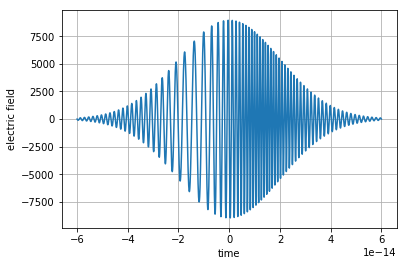

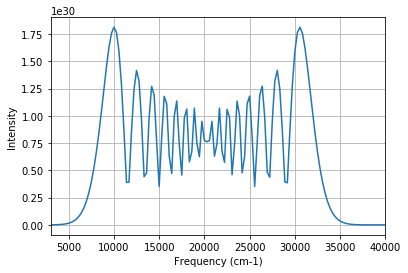

<Figure size 432x288 with 0 Axes>

In [3]:
plt.plot(t,E)
plt.grid()
plt.xlabel('time')
plt.ylabel('electric field')
plt.figure()
plt.plot(Frequency,np.abs(Spectrum)*c/t_range)
plt.grid()
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Intensity')
plt.xlim(3000,40000)
plt.figure()

## temporal profile

The leading edge is (negative times) as intensity ramps up, is the lower frequency.

The trailing slope (positive times) is the highest frequency.

As intensity increases, the index of refraction increases, slowing down the waves, as intensity decreases, the waves bunch together, increasing frequency.

## frequencies in the temporal profile

The freqencies present in the profile are a simple fft of the profile itself to transform it to the frequency domain from the time domain

## Changing Path length and intensity

The bandwidth spreads out linearly about the pulse frequency as you increase path length.
Which bandwith you call "white light" is dependent on your usage, but anywhere on the order of 0.0001 cm seems to be alright for the 20 fs pulse at $1e8 \mathsf{\frac{watt}{cm^2}}$ intensity.

There is a similar dependence on intensity, intensities on the order of $1e8 \mathsf{\frac{watt}{cm^2}}$ seem to be ideal.

Note on the extra apparent pattern at high intensities: the math works out such thtat a negative frequency would be observed, however a negative frequency is just a phase shift and shows up at the position of the positive frequency after taking the magnitude (with some interference effects).

In [ ]:
c = 3e10   #cm/s speed of light
numpts = 2**9   #number of data points
t_range = 12e-14   #range of times
t = np.linspace(-t_range/2, t_range/2, numpts)[None,:]  #times
Frequency = np.linspace(1/(t_range*c), numpts/(t_range*c), numpts)[None,:]   #frequencies
sigma = 2e-14   #width of the Gaussian pulse
no = 1.5    #refractive index
n2 = 1e-8    #intensity dependent refractive index
tau = 0    #position of the pulse in time
z = np.linspace(0, 0.001, 512)[:,None]   #position where you are watching the pulse in cm
nubar = 20000   #frequency of pulse in cm-1
omega = 2*np.pi*c*nubar   #frequency of pulse in radians/sec
intensity = 8e7   #intensity of pulse in watts/cm2
I = intensity*np.exp(-((t-tau)/sigma)**2)
ElectricField = np.sqrt(I)
E = ElectricField*np.sin(((no + n2 * I)*omega/c)*z-omega*t)
Spectrum = (np.fft.fft(E, axis=1))

(3000, 40000)

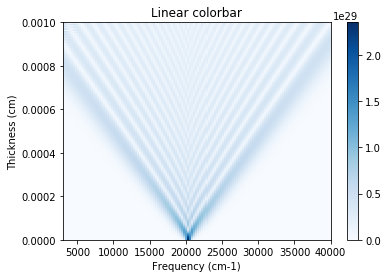

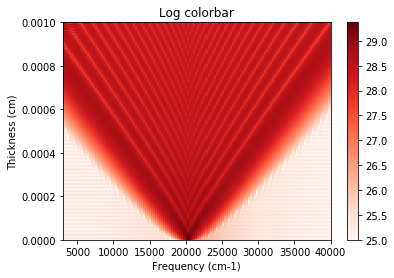

In [20]:
plt.title('Linear colorbar')
plt.pcolor(Frequency.flat, z.flat, np.abs(Spectrum)*c/t_range, cmap=wt.artists.colormaps['default'])
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Thickness (cm)')
plt.xlim(3000,40000)
plt.colorbar()
plt.figure()
plt.title('Log colorbar')
plt.pcolor(Frequency.flat, z.flat, np.log10(np.abs(Spectrum)*c/t_range),
           cmap=wt.artists.colormaps['default'],
           vmin=25
          )
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Thickness (cm)')
plt.colorbar()
plt.xlim(3000,40000)

In [6]:
c = 3e10   #cm/s speed of light
numpts = 2**9   #number of data points
t_range = 12e-14   #range of times
t = np.linspace(-t_range/2, t_range/2, numpts)[None,:]  #times
Frequency = np.linspace(1/(t_range*c), numpts/(t_range*c), numpts)[None,:]   #frequencies
sigma = 2e-14   #width of the Gaussian pulse
no = 1.5    #refractive index
n2 = 1e-8    #intensity dependent refractive index
tau = 0    #position of the pulse in time
z = 0.0005   #position where you are watching the pulse in cm
nubar = 20000   #frequency of pulse in cm-1
omega = 2*np.pi*c*nubar   #frequency of pulse in radians/sec
intensity = np.linspace(0,5e8,512)[:,None]   #intensity of pulse in watts/cm2
I = intensity*np.exp(-((t-tau)/sigma)**2)
ElectricField = np.sqrt(I)
E = ElectricField*np.sin(((no + n2 * I)*omega/c)*z-omega*t)
Spectrum = (np.fft.fft(E, axis=1))

/home/jupyter/env/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: divide by zero encountered in log10
  


(3000, 40000)

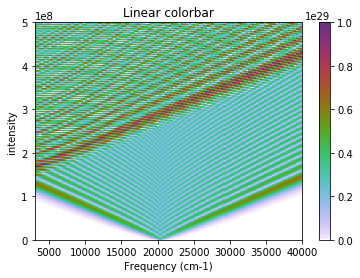

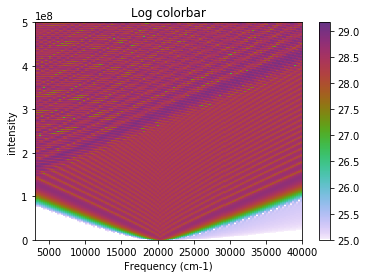

In [7]:
#plt.figure()
plt.title('Linear colorbar')
plt.pcolor(Frequency.flat, intensity.flat, np.abs(Spectrum)*c/t_range,
           cmap=wt.artists.colormaps['default'],
           vmax=1e29
          )
plt.xlabel('Frequency (cm-1)')
plt.ylabel('intensity')
#plt.yscale('log')
plt.xlim(3000,40000)
plt.colorbar()
plt.figure()
plt.title('Log colorbar')
plt.pcolor(Frequency.flat, intensity.flat, np.log10(np.abs(Spectrum)*c/t_range),
           cmap=wt.artists.colormaps['default'],
           vmin=25
          )
plt.xlabel('Frequency (cm-1)')
plt.ylabel('intensity')
plt.colorbar()
#plt.yscale('log')
plt.xlim(3000,40000)

## Changing pulse width in time

Increasing the pulse width in time decreases the transient intensity, lowering the effect of self phase modulation.
As a result, longer path lengths are needed.

The below plots show a 200 fs pulse first on the same set of axes as a 20 fs pulse above, then on a more appropriate choice of length scale.

The scale required for 200 fs pulses is about an order of magnitude higher that that for a 20 fs pulse, at around $10^{-3}$.

In [8]:
c = 3e10   #cm/s speed of light
numpts = 2**9   #number of data points
t_range = 12e-14   #range of times
t = np.linspace(-t_range/2, t_range/2, numpts)[None,:]  #times
Frequency = np.linspace(1/(t_range*c), numpts/(t_range*c), numpts)[None,:]   #frequencies
sigma = 2e-13   #width of the Gaussian pulse
no = 1.5    #refractive index
n2 = 1e-8    #intensity dependent refractive index
tau = 0    #position of the pulse in time
z = np.linspace(0, 0.001, 512)[:,None]   #position where you are watching the pulse in cm
nubar = 20000   #frequency of pulse in cm-1
omega = 2*np.pi*c*nubar   #frequency of pulse in radians/sec
intensity = 8e7   #intensity of pulse in watts/cm2
I = intensity*np.exp(-((t-tau)/sigma)**2)
ElectricField = np.sqrt(I)
E = ElectricField*np.sin(((no + n2 * I)*omega/c)*z-omega*t)
Spectrum = (np.fft.fft(E, axis=1))

(3000, 40000)

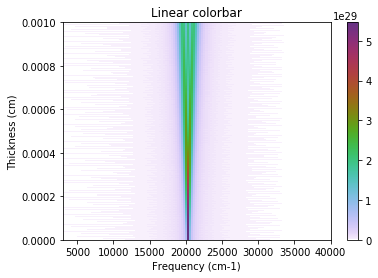

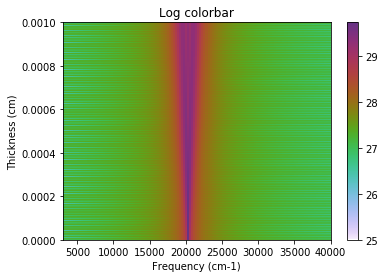

In [9]:
plt.title('Linear colorbar')
plt.pcolor(Frequency.flat, z.flat, np.abs(Spectrum)*c/t_range, cmap=wt.artists.colormaps['default'])
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Thickness (cm)')
plt.xlim(3000,40000)
plt.colorbar()
plt.figure()
plt.title('Log colorbar')
plt.pcolor(Frequency.flat, z.flat, np.log10(np.abs(Spectrum)*c/t_range),
           cmap=wt.artists.colormaps['default'],
           vmin=25
          )
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Thickness (cm)')
plt.colorbar()
plt.xlim(3000,40000)

In [10]:
c = 3e10   #cm/s speed of light
numpts = 2**9   #number of data points
t_range = 12e-14   #range of times
t = np.linspace(-t_range/2, t_range/2, numpts)[None,:]  #times
Frequency = np.linspace(1/(t_range*c), numpts/(t_range*c), numpts)[None,:]   #frequencies
sigma = 2e-13   #width of the Gaussian pulse
no = 1.5    #refractive index
n2 = 1e-8    #intensity dependent refractive index
tau = 0    #position of the pulse in time
z = np.linspace(0, 0.01, 512)[:,None]   #position where you are watching the pulse in cm
nubar = 20000   #frequency of pulse in cm-1
omega = 2*np.pi*c*nubar   #frequency of pulse in radians/sec
intensity = 8e7   #intensity of pulse in watts/cm2
I = intensity*np.exp(-((t-tau)/sigma)**2)
ElectricField = np.sqrt(I)
E = ElectricField*np.sin(((no + n2 * I)*omega/c)*z-omega*t)
Spectrum = (np.fft.fft(E, axis=1))

(3000, 40000)

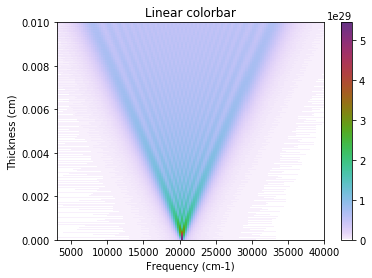

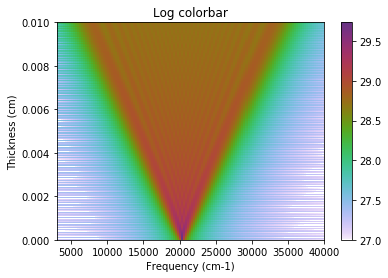

In [11]:
plt.title('Linear colorbar')
plt.pcolor(Frequency.flat, z.flat, np.abs(Spectrum)*c/t_range, cmap=wt.artists.colormaps['default'])
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Thickness (cm)')
plt.xlim(3000,40000)
plt.colorbar()
plt.figure()
plt.title('Log colorbar')
plt.pcolor(Frequency.flat, z.flat, np.log10(np.abs(Spectrum)*c/t_range),
           cmap=wt.artists.colormaps['default'],
           vmin=27
          )
plt.xlabel('Frequency (cm-1)')
plt.ylabel('Thickness (cm)')
plt.colorbar()
plt.xlim(3000,40000)

# Solitons

A soliton requires the balancing of two counteracting effects on the temporal shape of the pulse.

Self-phase modulation inherently broadens the frequency range, while shortening the pulse.

GVD also broadens the frequency, but lengthens the pulse.

Normal GVD and self-phase modulation will both result in lower frequencies arriving first, and while, the overal pulse with may be unaffected, it's shape in time could be drastically changed by the combination of the two effects.


Anomolous dispersion counteracts the effect of Kerr lensing.


The below illustration is shared from https://en.wikipedia.org/wiki/File:Temporal_soliton_explanation.svg

It was originally created by Alessio Damato, and is used under the terms of the CC-BY-SA license.



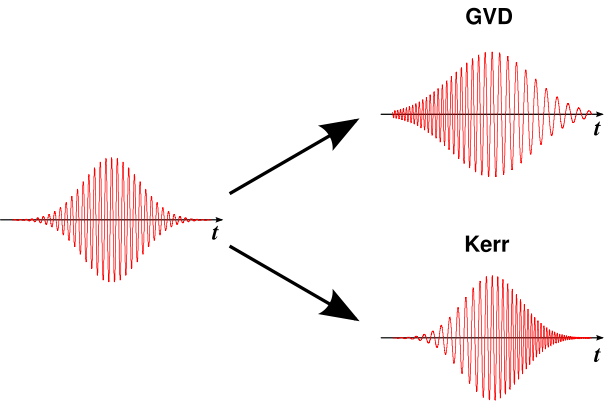

In [12]:
from IPython.display import Image
Image('soliton.png')